In [1]:
import yaml

In [2]:
with open('./utils/sportVSbahia.yaml', 'r', encoding='utf8') as file:
    dados = yaml.safe_load(file)

In [9]:
dados

{'1987': {'Sport': {'Estadual': 1,
   'Regional': None,
   'Brasileirão': 10,
   'Copa_Brasil': None,
   'Sul-Americana': None,
   'Libertadores': None},
  'Bahia': {'Estadual': 3,
   'Regional': None,
   'Brasileirão': 2,
   'Copa_Brasil': None,
   'Sul-Americana': None,
   'Libertadores': None}},
 '1988': {'Sport': {'Estadual': 3,
   'Regional': None,
   'Brasileirão': 5,
   'Copa_Brasil': None,
   'Sul-Americana': None,
   'Libertadores': 2},
  'Bahia': {'Estadual': 3,
   'Regional': None,
   'Brasileirão': 10,
   'Copa_Brasil': None,
   'Sul-Americana': None,
   'Libertadores': None}},
 '1989': {'Sport': {'Estadual': 0,
   'Regional': None,
   'Brasileirão': -4,
   'Copa_Brasil': 8,
   'Sul-Americana': None,
   'Libertadores': None},
  'Bahia': {'Estadual': 1,
   'Regional': 0,
   'Brasileirão': 2,
   'Copa_Brasil': 0,
   'Sul-Americana': None,
   'Libertadores': 6}},
 '1990': {'Sport': {'Estadual': 1,
   'Regional': None,
   'Brasileirão': 5,
   'Copa_Brasil': None,
   'Sul-Americ

In [5]:
sport = {}
bahia = {}

In [6]:
for ano, dado in dados.items():
    for time, pontos in dado.items():
        soma = sum(v if v is not None else 0 for v in pontos.values())
        if time == 'Sport':
            sport[ano] = soma
        elif time == 'Bahia':
            bahia[ano] = soma

In [12]:

print("ANO  | SPORT | BAHIA | VENCEU")
for ano in dados.keys():
    emoji = "🦁 SPT" if sport[ano] > bahia[ano] else "🦸‍♂️ BAH"
    print(f"{ano} |  {sport[ano]:02d}   |  {bahia[ano]:02d}   |  {emoji}")

ANO  | SPORT | BAHIA | VENCEU
1987 |  11   |  05   |  🦁 SPT
1988 |  10   |  13   |  🦸‍♂️ BAH
1989 |  04   |  09   |  🦸‍♂️ BAH
1990 |  06   |  07   |  🦸‍♂️ BAH
1991 |  06   |  06   |  🦸‍♂️ BAH
1992 |  12   |  03   |  🦁 SPT
1993 |  04   |  05   |  🦸‍♂️ BAH
1994 |  09   |  11   |  🦸‍♂️ BAH
1995 |  02   |  04   |  🦸‍♂️ BAH
1996 |  08   |  04   |  🦁 SPT
1997 |  09   |  00   |  🦁 SPT
1998 |  09   |  05   |  🦁 SPT
1999 |  07   |  07   |  🦸‍♂️ BAH
2000 |  17   |  04   |  🦁 SPT
2001 |  -1   |  13   |  🦸‍♂️ BAH
2002 |  00   |  07   |  🦸‍♂️ BAH
2003 |  09   |  -4   |  🦁 SPT
2004 |  01   |  03   |  🦸‍♂️ BAH
2005 |  01   |  -4   |  🦁 SPT
2006 |  07   |  01   |  🦁 SPT
2007 |  05   |  05   |  🦸‍♂️ BAH
2008 |  15   |  01   |  🦁 SPT
2009 |  04   |  01   |  🦁 SPT
2010 |  04   |  05   |  🦸‍♂️ BAH
2011 |  05   |  03   |  🦁 SPT
2012 |  -3   |  07   |  🦸‍♂️ BAH
2013 |  07   |  05   |  🦁 SPT
2014 |  12   |  02   |  🦁 SPT
2015 |  09   |  07   |  🦁 SPT
2016 |  06   |  08   |  🦸‍♂️ BAH
2017 |  12   |  08   |  🦁

In [13]:
vitorias_sport = sum(1 for ano in dados.keys() if sport[ano] > bahia[ano])
vitorias_bahia = sum(1 for ano in dados.keys() if bahia[ano] > sport[ano])

print(f"Sport venceu {vitorias_sport} vezes.")
print(f"Bahia venceu {vitorias_bahia} vezes.")

Sport venceu 16 vezes.
Bahia venceu 16 vezes.


In [14]:
total_sport = sum(sport.values())
total_bahia = sum(bahia.values())

print(f"Sport fez um total de {total_sport} pontos.")
print(f"Bahia fez um total de {total_bahia} pontos.")

Sport fez um total de 215 pontos.
Bahia fez um total de 199 pontos.


In [15]:
# prompt: divida os dados do sport e bahia por decada

sport_por_decada = {}
bahia_por_decada = {}

for ano, dado in dados.items():
    decada = str(ano)[:3] + '0s'
    sport_pontos = sum(v if v is not None else 0 for k, v in dado.items() if k == 'Sport' for v in v.values())
    bahia_pontos = sum(v if v is not None else 0 for k, v in dado.items() if k == 'Bahia' for v in v.values())

    if decada not in sport_por_decada:
        sport_por_decada[decada] = 0
        bahia_por_decada[decada] = 0

    sport_por_decada[decada] += sport_pontos
    bahia_por_decada[decada] += bahia_pontos

print("\nPontos por década:")
print("DECADA | SPORT | BAHIA | VENCEDOR DA DECADA")
for decada in sorted(sport_por_decada.keys()):
    sport_total = sport_por_decada[decada]
    bahia_total = bahia_por_decada[decada]
    vencedor_decada = "🦁 Sport" if sport_total > bahia_total else "🦸‍♂️ Bahia" if bahia_total > sport_total else "🤝 Empate"
    print(f"{decada}  |  {sport_total:02d}   |  {bahia_total:02d}   | {vencedor_decada}")

vitorias_decada_sport = sum(1 for decada in sport_por_decada.keys() if sport_por_decada[decada] > bahia_por_decada[decada])
vitorias_decada_bahia = sum(1 for decada in sport_por_decada.keys() if bahia_por_decada[decada] > sport_por_decada[decada])

print(f"\nSport venceu {vitorias_decada_sport} décadas.")
print(f"Bahia venceu {vitorias_decada_bahia} décadas.")



Pontos por década:
DECADA | SPORT | BAHIA | VENCEDOR DA DECADA
1980s  |  25   |  27   | 🦸‍♂️ Bahia
1990s  |  72   |  52   | 🦁 Sport
2000s  |  58   |  27   | 🦁 Sport
2010s  |  55   |  66   | 🦸‍♂️ Bahia
2020s  |  05   |  27   | 🦸‍♂️ Bahia

Sport venceu 2 décadas.
Bahia venceu 3 décadas.


In [3]:
#import matplotlib.pyplot as plt
import numpy as np

In [17]:
sport_pts = [ponto for ponto in sport.values()]
bahia_pts = [ponto for ponto in bahia.values()]

x = np.array([i for i in range(len(sport_pts))])
y = np.array(sport_pts)

coef = np.polyfit(x, y, 2)

coef

array([-6.58442609e-04, -9.78039295e-02,  7.95649597e+00])

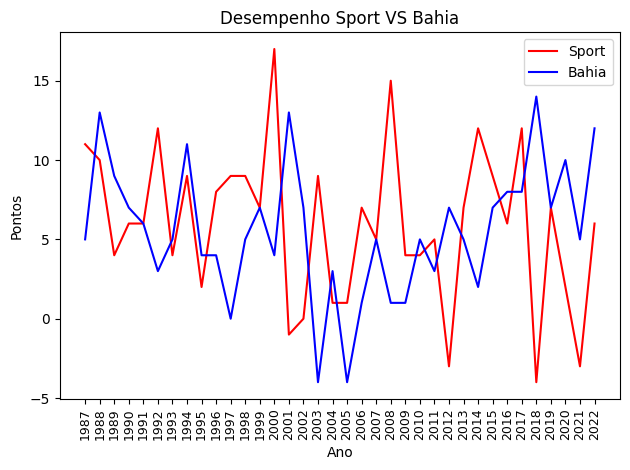

In [17]:
# Dados de exemplo
x = [int(ano) for ano in dados.keys()]
sport_pts = [ponto for ponto in sport.values()]
bahia_pts = [ponto for ponto in bahia.values()]

# Criar gráfico de linha
plt.plot(x, sport_pts, label='Sport', color='r')
plt.plot(x, bahia_pts, label='Bahia', color='b')

# Adicionar título e rótulos
plt.title('Desempenho Sport VS Bahia')
plt.xlabel('Ano')
plt.ylabel('Pontos')

plt.legend()
plt.xticks(x, rotation=90, fontsize=9)
plt.tight_layout()
# Exibir o gráfico
plt.show()

In [18]:
sport_br = {}
bahia_br = {}

for ano, dado in dados.items():
    for time, pontos in dado.items():
        soma = pontos['Brasileirão']
        if time == 'Sport':
            sport_br[ano] = soma
        elif time == 'Bahia':
            bahia_br[ano] = soma

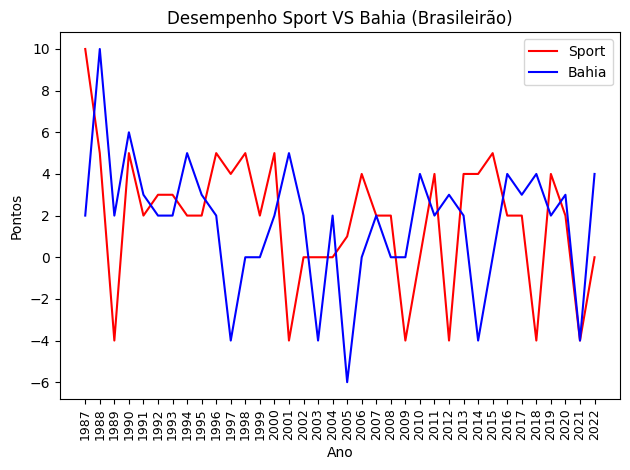

In [19]:
# Dados de exemplo
x = [int(ano) for ano in dados.keys()]
sport_pts = [ponto for ponto in sport_br.values()]
bahia_pts = [ponto for ponto in bahia_br.values()]

# Criar gráfico de linha
plt.plot(x, sport_pts, label='Sport', color='r')
plt.plot(x, bahia_pts, label='Bahia', color='b')

# Adicionar título e rótulos
plt.title('Desempenho Sport VS Bahia (Brasileirão)')
plt.xlabel('Ano')
plt.ylabel('Pontos')

plt.legend()
plt.xticks(x, rotation=90, fontsize=9)
plt.tight_layout()
# Exibir o gráfico
plt.show()

In [20]:
sport_cdb = {}
bahia_cdb = {}

for ano, dado in dados.items():
    for time, pontos in dado.items():
        soma = pontos['Copa_Brasil']
        if time == 'Sport':
            sport_cdb[ano] = soma
        elif time == 'Bahia':
            bahia_cdb[ano] = soma

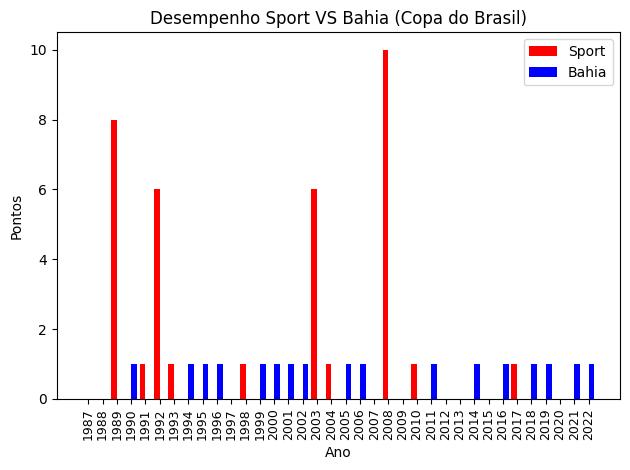

In [21]:
# Dados de exemplo
anos = [int(ano) for ano in dados.keys()]
sport_pts = [ponto for ponto in sport_cdb.values()]
bahia_pts = [ponto for ponto in bahia_cdb.values()]

sport_pts = [ponto if ponto is not None else 0 for ponto in sport_pts]
bahia_pts = [ponto if ponto is not None else 0 for ponto in bahia_pts]

x = np.arange(len(anos))
largura = 0.4

# Criar gráfico de linha
plt.bar(x - largura/2, sport_pts, width=largura, label='Sport', color='r')
plt.bar(x + largura/2, bahia_pts, width=largura, label='Bahia', color='b')

# Adicionar título e rótulos
plt.title('Desempenho Sport VS Bahia (Copa do Brasil)')
plt.xlabel('Ano')
plt.ylabel('Pontos')

plt.legend()
plt.xticks(x, anos, rotation=90, fontsize=9)
plt.tight_layout()
# Exibir o gráfico
plt.show()